
# The Machine Learning Workflow

A typical machine learning workflow is a structured process that guides the development of machine learning models. It consists of several key steps, each contributing to the successful deployment of a model. The workflow can be summarized as follows:

1.  **Problem Definition**: Clearly define the problem you want to solve with machine learning. This includes understanding the context and the specific goals of the project.
2.  **Data Collection**: Gather the necessary data that will be used to train and evaluate the model. This data can come from various sources, such as databases, APIs, or web scraping.
3.  **Data Exploration and Preprocessing**: Analyze the collected data to understand its structure, quality, and characteristics. This step often involves cleaning the data, handling missing values, and transforming features to make them suitable for modeling.
4.  **Model Selection**: Choose the appropriate machine learning algorithms based on the problem type (e.g., classification, regression) and the nature of the data. This may involve experimenting with different models to find the best fit.
5.  **Model Training and Validation**: Train the selected model on the training dataset and validate its performance using a separate validation set. This step includes tuning hyperparameters to optimize the model's performance.
6.  **Model Evaluation**: Assess the model's performance using metrics relevant to the problem, such as accuracy, precision, recall, or F1 score. This evaluation helps determine if the model meets the desired criteria.
7.  **Model Deployment and Monitoring**: Once the model is deemed satisfactory, deploy it to a production environment where it can make predictions on new data. Continuous monitoring is essential to ensure the model remains effective over time, especially as new data becomes available.

## Practical Demonstration

We will demonstrate a simple machine learning workflow using the California housing dataset. This dataset is commonly used for regression tasks and contains information about various features of houses in California, along with their median house values.

We begin by loading the dataset, exploring its structure, and then proceeding through the steps of the machine learning workflow, including data preprocessing, model training, and evaluation (we will not demonstrate deployment in this notebook).

-   **Load the California housing dataset**: This dataset is available in the `sklearn.datasets` module and can be easily loaded into a pandas `DataFrame`.

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [2]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Display some key information about the dataset
print("California Housing Dataset")
print(data.DESCR)  # Description of the dataset
print("Feature names:", data.feature_names)
print("Target variable:", data.target.name)

California Housing Dataset
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. c

-   **Quick exploration**: We will check the shape of the dataset, the names of the columns, and identify the target variable; we will also visualize the correlation matrix to understand the relationships between features.

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Target:", data.target.name)

Shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
Target: MedHouseVal


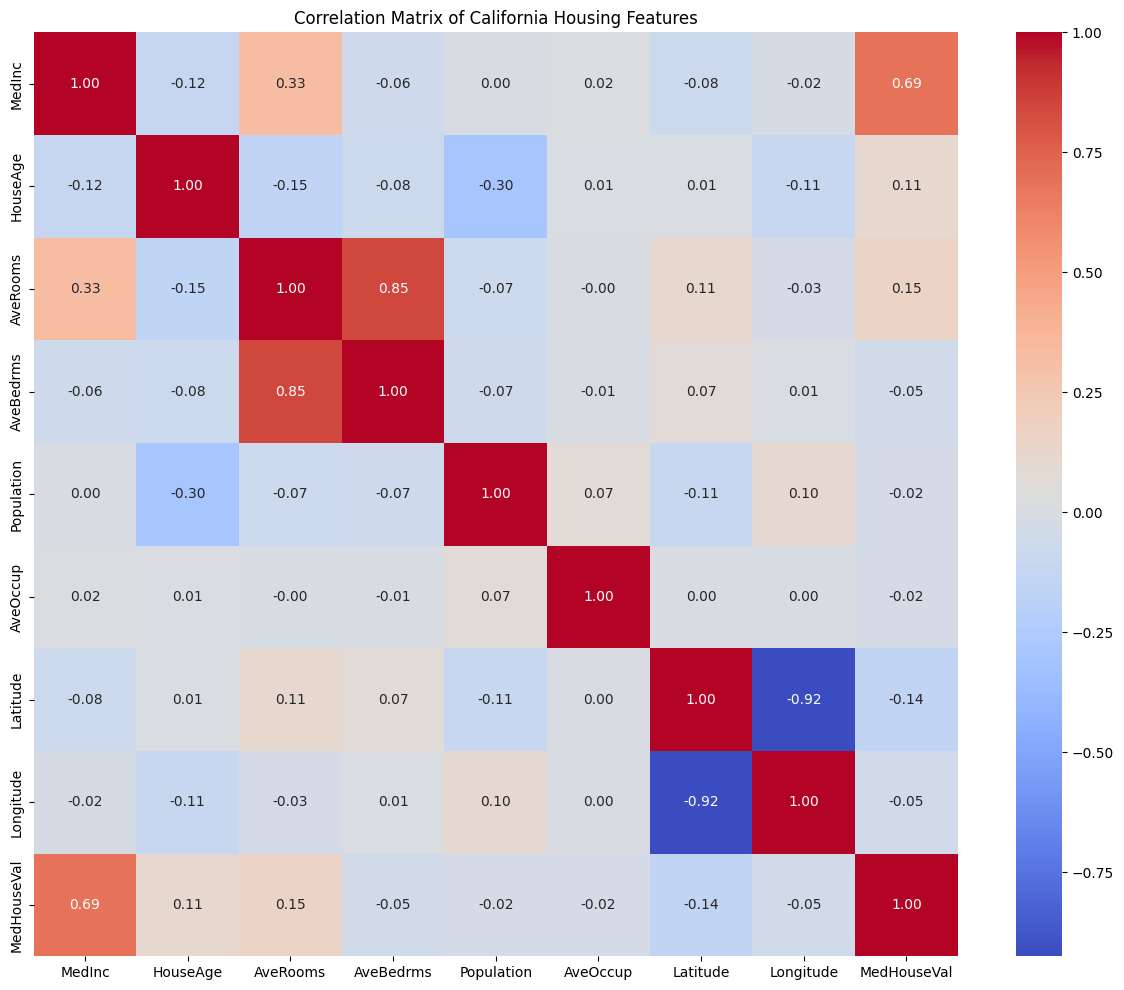

In [5]:
# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

-   **Split features and target**: We will separate the features (independent variables) from the target variable (dependent variable).

In [6]:
X = df.drop(columns=[data.target.name])
y = df[data.target.name]

-   **Train-test split**: We will split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-   **Model training**: We will use a simple linear regression model to fit the training data.

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-   **Prediction and evaluation**: Finally, we will make predictions on the test set and evaluate the model's performance using mean squared error (MSE) as the metric.

In [9]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE on test set: {mse:.2f}")

r2 = model.score(X_test, y_test)
print(f"R-squared on test set: {r2:.2f}")

MSE on test set: 0.56
R-squared on test set: 0.58


-   **Visualizing the predictions**: We can also visualize the predictions against the actual values to get a better understanding of the model's performance.

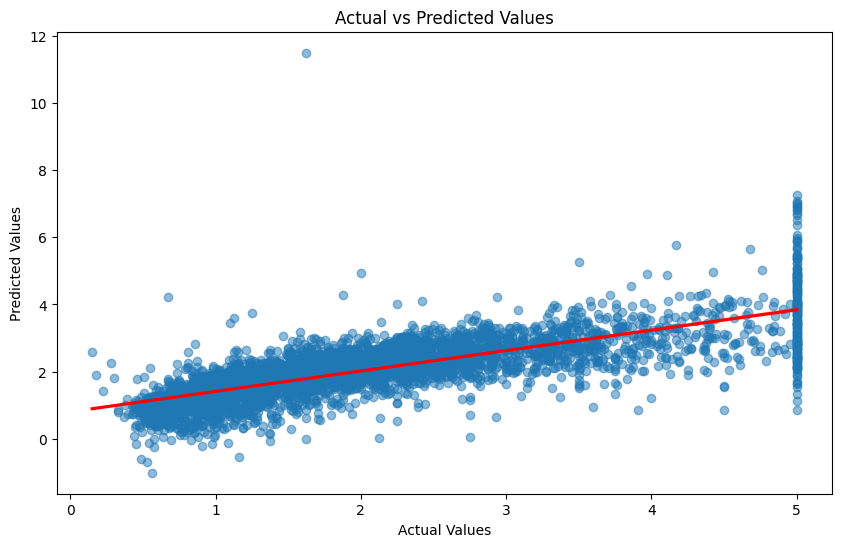

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Finally, let's save the California housing dataset to a CSV file for later use.

In [11]:
# Save the DataFrame to a CSV file
df.to_csv('../../data/california_housing.csv', index=False)
print("California housing dataset saved to 'california_housing.csv'")

California housing dataset saved to 'california_housing.csv'


## Hands-on Exercises

Use the Ames housing dataset from OpenML to practice the machine learning workflow. The Ames housing dataset is a well-known dataset for regression tasks, containing various features of houses in Ames, Iowa, along with their sale prices. The dataset is available on OpenML and can be loaded using the `fetch_openml` function from `sklearn.datasets`.

-   Load the Ames housing dataset from OpenML (`house_prices`);

In [12]:
from sklearn.datasets import fetch_openml
import pandas as pd

data = fetch_openml('house_prices', as_frame=True, parser="auto")
df = data.frame

-   Explore its structure

In [13]:
print("Ames Housing Dataset")
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1] - 1)
print("Target variable:", data.target.name)

Ames Housing Dataset
Number of samples: 1460
Number of features: 80
Target variable: SalePrice


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

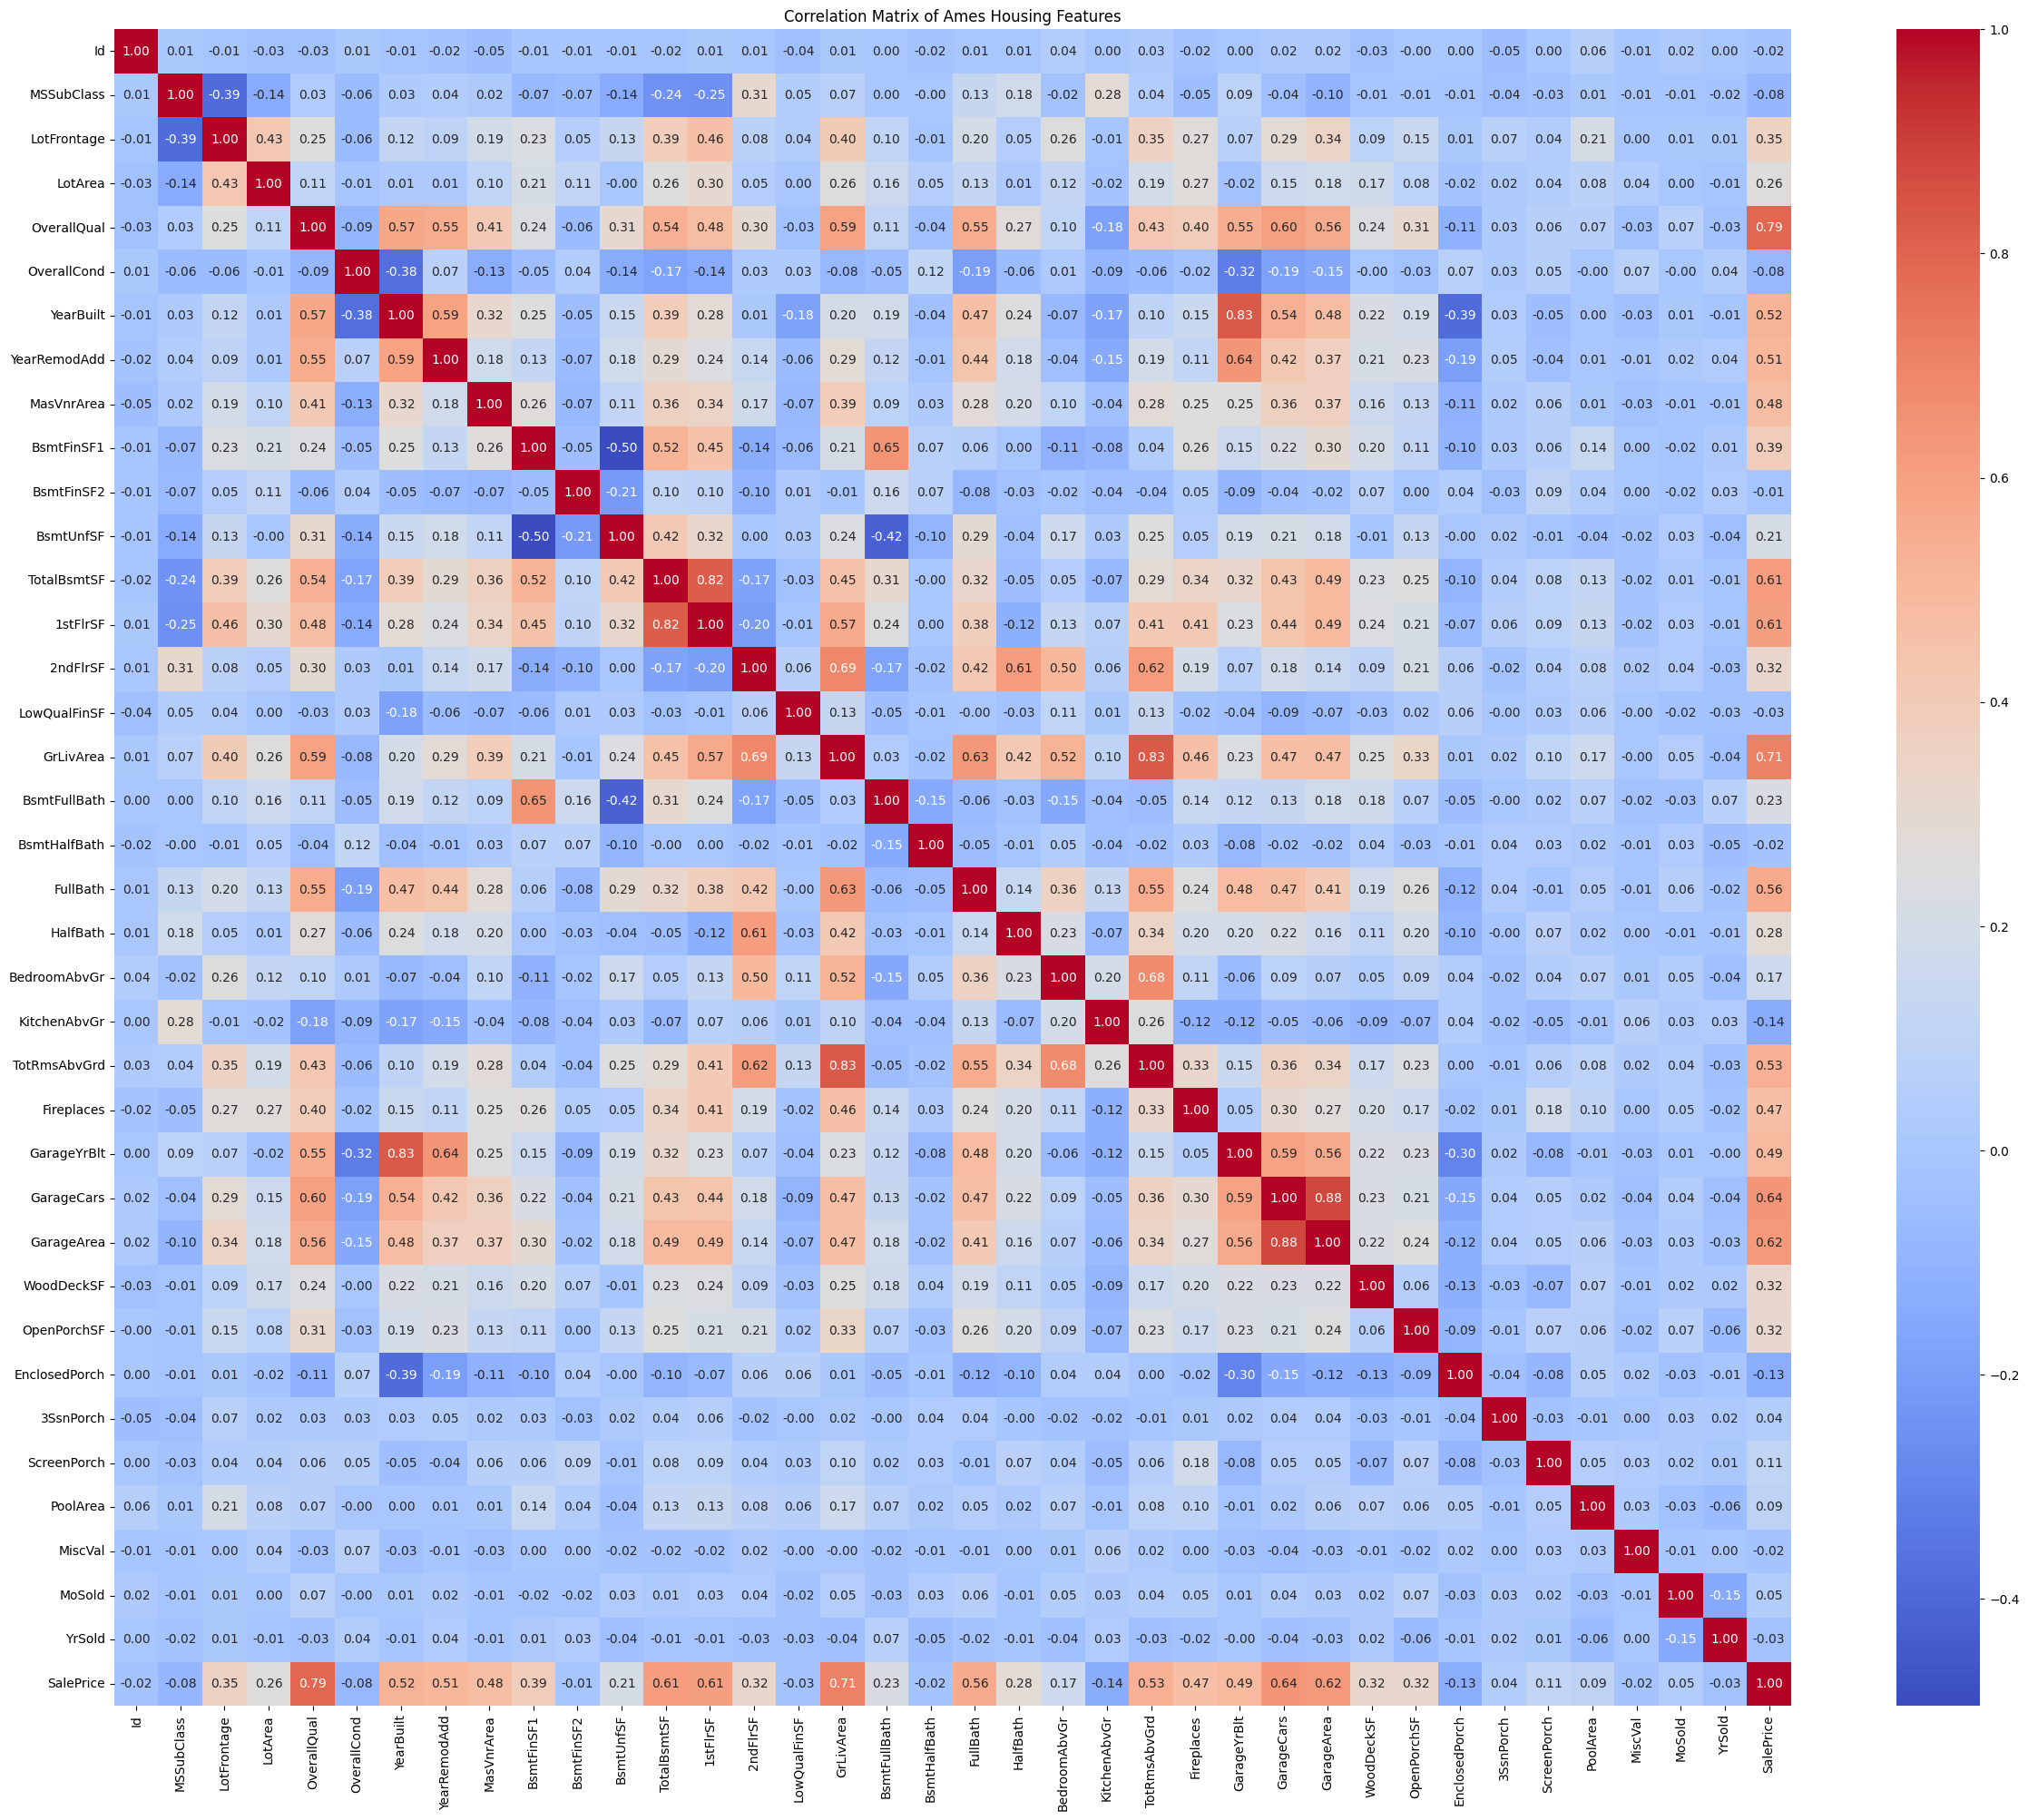

In [15]:
# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(30, 24))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Ames Housing Features')
plt.show()

-   Retain only the feature with the highest correlation to the target

In [16]:
# Retain only a single feature for simplicity
df = df[['OverallQual', 'SalePrice']]

-   Split the features and target variable

In [17]:
# Separate features and target
X = df.drop(columns=[data.target.name])
y = df[data.target.name]

-   Perform the train-test split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-   Choose a different regression model, such as Decision Tree Regression or Random Forest Regression (you should search on the web for how to use these models in `scikit-learn`).

In [19]:
# Use Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

-   Train the model

In [20]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


-   Evaluate the model

In [21]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE on test set: {mse:.2f}")

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared on test set: {r2:.2f}")

MSE on test set: 2144932278.91
R-squared on test set: 0.72


-   Visualize the predictions against the actual values

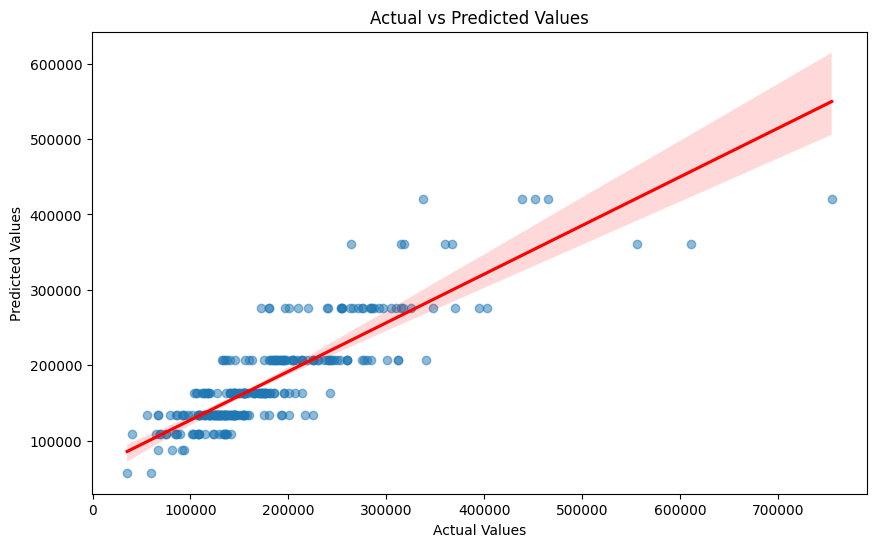

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred,
            scatter_kws={'alpha':0.5},
            line_kws={'color':'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Summary

In this section, we have covered the machine learning workflow, including problem definition, data collection, exploration, preprocessing, model selection, training, evaluation, and deployment. We demonstrated a simple workflow using the California housing dataset, and we practiced the workflow using the Ames housing dataset.